In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df_vehicle19 = pd.read_csv('C:/Users/gexin/Desktop/vehicle_dataset/vehicle19_fuelLevel.csv', sep=';')
df_veh19_ing = pd.read_csv('C:/Users/gexin/Desktop/vehicle_dataset/vehicle19_ingection.csv', sep=';')
df_TSID19 = pd.read_csv('C:/Users/gexin/Desktop/vehicle_dataset/TSID_19_refuling2.csv', sep='\t', encoding = 'windows-1251')


In [54]:
#в качестве целевой переменной можно добавить столбец "refill", в который будет 
#добавляться 0 - если произошла заправка, 1 - если заправка не произошла
#Далее можно взять все строки, где refill = 0 и выяснить, в какую дату и время 
#была произведена заправка

In [76]:
#Данные об уровне топлива в машине 19
df_vehicle19.head(100)

,DTIME,BEVALUE
0,2020-01-09 06:54:54,"48,2"
1,2020-01-09 06:55:55,"48,4"
2,2020-01-09 06:56:55,"48,7"
3,2020-01-09 06:57:55,"48,6"
4,2020-01-09 06:58:55,"48,5"
...,...,...
95,2020-01-09 08:30:07,"40,4"
96,2020-01-09 08:31:07,"40,4"
97,2020-01-09 08:32:07,"40,3"
98,2020-01-09 08:33:07,"40,3"


In [77]:
#посмотрим размерность данных
df_vehicle19.shape

(5341, 2)

In [78]:
#проверим пропуски
df_vehicle19.isna().mean()

DTIME      0.0
BEVALUE    0.0
dtype: float64

In [79]:
#проверим на дубликаты
df_vehicle19.duplicated().sum()

0

In [80]:
df_vehicle19.describe()
#достаточно много повторяющихся значений

,DTIME,BEVALUE
count,5341,5341
unique,5341,558
top,2020-01-09 08:13:07,"26,4"
freq,1,157


In [81]:
df_vehicle19[df_vehicle19['BEVALUE'] == 0]

,DTIME,BEVALUE


In [199]:
'''
- колонки в переименовании не нуждаются
- пропуски и дубликаты отсуствуют
- из данных можем извлечь временную метку резкого повышения\понижения топлива
- можно отследить, как часто машина заправляется
'''

'\n- колонки в переименовании не нуждаются\n- пропуски и дубликаты отсуствуют\n- из данных можем извлечь временную метку резкого повышения\\понижения топлива\n- можно отследить, как часто машина заправляется\n'

In [82]:
#Данные о состоянии замка зажигания машины 19
df_veh19_ing.head()

,DTIME,BEVALUE
0,2020-01-09 06:54:54,1
1,2020-01-09 06:55:55,1
2,2020-01-09 06:56:55,1
3,2020-01-09 06:57:55,1
4,2020-01-09 06:58:55,1


In [83]:
#Проверим размерность. Тут больший объем данных, нежели в уровне топлива
df_veh19_ing.shape

(7053, 2)

In [84]:
#проверим пропуски
df_veh19_ing.isna().mean()

DTIME      0.0
BEVALUE    0.0
dtype: float64

In [85]:
df_veh19_ing.duplicated().sum()

0

In [86]:
#посмотрим описательные статистики
df_veh19_ing.describe()

,BEVALUE
count,7053.000000
mean,0.977598
std,0.147997
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,1.000000


In [87]:
df_veh19_ing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7053 entries, 0 to 7052
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   DTIME    7053 non-null   object
 1   BEVALUE  7053 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 110.3+ KB


In [206]:
'''
- пропуски и дубликаты отсуствуют
- здесь значений больше, чем в данных о топливе, но можно проверить совпадения
по времени и соединить эти таблицы, так будет проще работать, наблюдая
работает машина или нет

'''

'\n- пропуски и дубликаты отсуствуют\n- здесь значений больше, чем в данных о топливе, но можно проверить совпадения\nпо времени и соединить эти таблицы, так будет проще работать, наблюдая\nработает машина или нет\n\n'

In [88]:
#Данные о событиях заправки/слива топлива
df_TSID19.head()

,TSID,Дата начала,Дата окончания,Событие,Объём изменения,Начальный объём,Итоговый объём
0,19,2020-02-03 13:42:55,2020-02-04 14:56:51,Заправка топлива,"11,3","3,9","15,2"
1,19,2020-02-10 12:00:42,2020-02-10 12:04:42,Заправка топлива,"17,4","5,5","22,9"
2,19,2020-02-14 13:59:24,2020-02-14 14:03:24,Заправка топлива,"21,6","4,6","26,2"
3,19,2020-03-03 10:24:58,2020-03-03 10:33:08,Заправка топлива,"90,9","0,3","91,2"
4,19,2020-03-03 13:39:55,2020-03-03 13:43:55,Слив топлива,"18,6","89,2","70,6"


In [89]:
df_TSID19.shape

(8, 7)

In [69]:
'''
- в таблице нет дубликатов или нулевых значений
- из таблицы можно вычислить временной промежуток заправки и слива,
сравнить его с данными по уровню топлива и определить, как выглядят данные,
когда точно идет заправка или слив
- возможно, благодаря этому научиться распознать заправку или слив на оставшихся 
данных
- нужно будет заменить заправку топлива на 0, слив на 1 для удобства
'''

'\n- в таблице нет дубликатов или нулевых значений\n- из таблицы можно вычислить временной промежуток заправки и слива,\nсравнить его с данными по уровню топлива и определить, как выглядят данные,\nкогда точно идет заправка или слив\n- возможно, благодаря этому научиться распознать заправку или слив на оставшихся \nданных\n- нужно будет заменить заправку топлива на 1, слив на 0 для удобства\n'

In [90]:
#для удобства работы с данными соединим таблицу зажигания и уровня топлива по времени
df_vehicle19_all = pd.merge(df_vehicle19, df_veh19_ing, on='DTIME', how='outer')

In [91]:
df_vehicle19_all

,DTIME,BEVALUE_x,BEVALUE_y
0,2020-01-09 06:54:54,"48,2",1
1,2020-01-09 06:55:55,"48,4",1
2,2020-01-09 06:56:55,"48,7",1
3,2020-01-09 06:57:55,"48,6",1
4,2020-01-09 06:58:55,"48,5",1
...,...,...,...
7048,2020-09-25 13:38:47,NaN,1
7049,2020-09-25 13:38:53,NaN,1
7050,2020-09-25 13:39:21,NaN,1
7051,2020-09-25 13:39:31,NaN,1


In [92]:
#переименуем колонки для удобства
df_vehicle19_all.columns = ['DTIME', 'BEVALUE_fuel', 'BEVALUE_ing']
df_vehicle19_all

,DTIME,BEVALUE_fuel,BEVALUE_ing
0,2020-01-09 06:54:54,"48,2",1
1,2020-01-09 06:55:55,"48,4",1
2,2020-01-09 06:56:55,"48,7",1
3,2020-01-09 06:57:55,"48,6",1
4,2020-01-09 06:58:55,"48,5",1
...,...,...,...
7048,2020-09-25 13:38:47,NaN,1
7049,2020-09-25 13:38:53,NaN,1
7050,2020-09-25 13:39:21,NaN,1
7051,2020-09-25 13:39:31,NaN,1


In [93]:
#Из-за разных количеств значений в двух столбцах, некоторые fuel = NaN, посчитаем их
df_vehicle19_all.isna().sum()

DTIME              0
BEVALUE_fuel    1712
BEVALUE_ing        0
dtype: int64

In [96]:
#на данном этапе работы информация о том, включено зажигание или нет без инф-ии
#об уровне топлива не поможет вычислить хищение или заправку, потому можно удалить
#все значение с NaN
df_vehicle19_all.dropna(inplace=True)
df_vehicle19_all.head(1000)

,DTIME,BEVALUE_fuel,BEVALUE_ing
0,2020-01-09 06:54:54,48.2,1
1,2020-01-09 06:55:55,48.4,1
2,2020-01-09 06:56:55,48.7,1
3,2020-01-09 06:57:55,48.6,1
4,2020-01-09 06:58:55,48.5,1
...,...,...,...
995,2020-02-10 12:42:42,22.4,1
996,2020-02-10 12:43:42,22.1,1
997,2020-02-10 12:44:42,22.2,1
998,2020-02-10 12:45:42,22.2,1


In [ ]:
#в колонке с топливом заменим все запятые на точки
df_vehicle19_all['BEVALUE_fuel'] = [x.replace(',', '.') for x in df_vehicle19_all['BEVALUE_fuel']]

In [97]:
'''
Для последующего машинного обучения не подходит атрибут DateTime, по этой причине я разбила DateTime на столбцы.
'''

df_vehicle19_all['DTIME'] = pd.to_datetime(df_vehicle19_all['DTIME'])
df_vehicle19_all['Year'], df_vehicle19_all['Month'], df_vehicle19_all['Day'], df_vehicle19_all['Hour'],df_vehicle19_all['Minute'],df_vehicle19_all['Secons'] = df_vehicle19_all['DTIME'].dt.year, df_vehicle19_all['DTIME'].dt.month, df_vehicle19_all['DTIME'].dt.day, df_vehicle19_all['DTIME'].dt.hour, df_vehicle19_all['DTIME'].dt.minute, df_vehicle19_all['DTIME'].dt.second
df_vehicle19_all

,DTIME,BEVALUE_fuel,BEVALUE_ing,Year,Month,Day,Hour,Minute,Secons
0,2020-01-09 06:54:54,48.2,1,2020,1,9,6,54,54
1,2020-01-09 06:55:55,48.4,1,2020,1,9,6,55,55
2,2020-01-09 06:56:55,48.7,1,2020,1,9,6,56,55
3,2020-01-09 06:57:55,48.6,1,2020,1,9,6,57,55
4,2020-01-09 06:58:55,48.5,1,2020,1,9,6,58,55
...,...,...,...,...,...,...,...,...,...
5336,2020-09-25 13:29:53,14.8,1,2020,9,25,13,29,53
5337,2020-09-25 13:30:53,14.9,1,2020,9,25,13,30,53
5338,2020-09-25 13:31:53,14.8,1,2020,9,25,13,31,53
5339,2020-09-25 13:32:53,14.8,1,2020,9,25,13,32,53


In [98]:
df_vehicle19_all1 = df_vehicle19_all.head(100)
df_vehicle19_all1

,DTIME,BEVALUE_fuel,BEVALUE_ing,Year,Month,Day,Hour,Minute,Secons
0,2020-01-09 06:54:54,48.2,1,2020,1,9,6,54,54
1,2020-01-09 06:55:55,48.4,1,2020,1,9,6,55,55
2,2020-01-09 06:56:55,48.7,1,2020,1,9,6,56,55
3,2020-01-09 06:57:55,48.6,1,2020,1,9,6,57,55
4,2020-01-09 06:58:55,48.5,1,2020,1,9,6,58,55
...,...,...,...,...,...,...,...,...,...
95,2020-01-09 08:30:07,40.4,1,2020,1,9,8,30,7
96,2020-01-09 08:31:07,40.4,1,2020,1,9,8,31,7
97,2020-01-09 08:32:07,40.3,1,2020,1,9,8,32,7
98,2020-01-09 08:33:07,40.3,1,2020,1,9,8,33,7


C:\Users\gexin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='BEVALUE_fuel', ylabel='Density'>

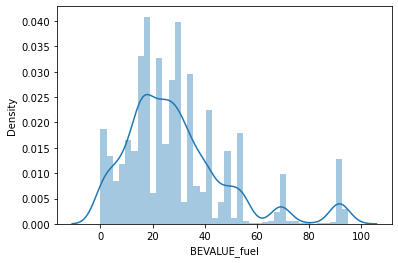

In [99]:
sns.distplot(df_vehicle19_all.BEVALUE_fuel)

In [101]:
train_vehicle19 = df_vehicle19_all.assign(Refill=np.nan)
train_vehicle19 

,DTIME,BEVALUE_fuel,BEVALUE_ing,Year,Month,Day,Hour,Minute,Secons,Refill
0,2020-01-09 06:54:54,48.2,1,2020,1,9,6,54,54,NaN
1,2020-01-09 06:55:55,48.4,1,2020,1,9,6,55,55,NaN
2,2020-01-09 06:56:55,48.7,1,2020,1,9,6,56,55,NaN
3,2020-01-09 06:57:55,48.6,1,2020,1,9,6,57,55,NaN
4,2020-01-09 06:58:55,48.5,1,2020,1,9,6,58,55,NaN
...,...,...,...,...,...,...,...,...,...,...
5336,2020-09-25 13:29:53,14.8,1,2020,9,25,13,29,53,NaN
5337,2020-09-25 13:30:53,14.9,1,2020,9,25,13,30,53,NaN
5338,2020-09-25 13:31:53,14.8,1,2020,9,25,13,31,53,NaN
5339,2020-09-25 13:32:53,14.8,1,2020,9,25,13,32,53,NaN


In [102]:
train_vehicle19 ['DTIME'] = pd.to_datetime(train_vehicle19['DTIME'])

In [104]:
#переименуем признаки
df_TSID19.columns = ['TSID','date_beginning','date_end','event','scope_of_change','scope_of_begin','result_scope']
df_TSID19

,TSID,date_beginning,date_end,event,scope_of_change,scope_of_begin,result_scope
0,19,2020-02-03 13:42:55,2020-02-04 14:56:51,Заправка топлива,"11,3","3,9","15,2"
1,19,2020-02-10 12:00:42,2020-02-10 12:04:42,Заправка топлива,"17,4","5,5","22,9"
2,19,2020-02-14 13:59:24,2020-02-14 14:03:24,Заправка топлива,"21,6","4,6","26,2"
3,19,2020-03-03 10:24:58,2020-03-03 10:33:08,Заправка топлива,"90,9","0,3","91,2"
4,19,2020-03-03 13:39:55,2020-03-03 13:43:55,Слив топлива,"18,6","89,2","70,6"
5,19,2020-03-05 07:49:46,2020-03-05 07:52:46,Слив топлива,"11,4","64,8","53,4"
6,19,2020-03-25 06:39:14,2020-03-25 06:48:17,Заправка топлива,"94,7","0,3",95
7,19,2020-03-26 09:34:00,2020-03-26 09:38:00,Слив топлива,"20,5","89,8","69,3"


In [105]:
#в TSID19 много запятых, нужно заменить их на точки, также события заправки и слива топлива закодировать 1 и 0.
import re    

for col in ['scope_of_change', 'scope_of_begin', 'result_scope']:
    df_TSID19[col] = pd.to_numeric(df_TSID19[col].apply(lambda x: re.sub(',', '.', str(x))))

In [106]:
# 0 - заправка, 1 - слив
from sklearn.preprocessing import LabelEncoder
non_numeric_feature = ['event']

for feature in non_numeric_feature:        
     df_TSID19[feature] = LabelEncoder().fit_transform(df_TSID19[feature])

In [107]:
#нужно поместить в обучающий сет, в колонку refill значение 0 в те временные промежутки
#где точно была заправка, исходя из таблицы TSID, а 1 туда, где был слив
df_TSID19['date_beginning'] = pd.to_datetime(df_TSID19['date_beginning'])
df_TSID19['date_end'] = pd.to_datetime(df_TSID19['date_end'])

# Create an IntervalIndex on df_b.
df_b = df_TSID19.set_index(['date_beginning', 'date_end'])
df_b.index = pd.IntervalIndex.from_tuples(df_b.index)

# Map based on the date of df_a.
train_vehicle19['Refill'] = train_vehicle19['DTIME'].map(df_b['event'])

In [108]:
# все известные нам промежутки сливов
df_sliv = train_vehicle19.loc[train_vehicle19['Refill'] == 1]
df_sliv

,DTIME,BEVALUE_fuel,BEVALUE_ing,Year,Month,Day,Hour,Minute,Secons,Refill
2134,2020-03-03 13:40:55,83.8,1,2020,3,3,13,40,55,1.0
2135,2020-03-03 13:41:55,79.2,1,2020,3,3,13,41,55,1.0
2136,2020-03-03 13:42:55,74.2,1,2020,3,3,13,42,55,1.0
2137,2020-03-03 13:43:55,69.5,1,2020,3,3,13,43,55,1.0
2238,2020-03-05 07:50:46,62,1,2020,3,5,7,50,46,1.0
2239,2020-03-05 07:51:46,55.5,1,2020,3,5,7,51,46,1.0
2240,2020-03-05 07:52:46,53.2,1,2020,3,5,7,52,46,1.0
3397,2020-03-26 09:35:00,84.8,1,2020,3,26,9,35,0,1.0
3398,2020-03-26 09:36:00,76.7,1,2020,3,26,9,36,0,1.0
3399,2020-03-26 09:37:00,70.1,1,2020,3,26,9,37,0,1.0


In [109]:
#заправка топлива
#тут есть выбросы в виде нулей, это может быть началом заправки или шумом в данных, но нули не помогут нам определить точно 
#заправку, потому значения с нулями я уберу, плюс их нет в начальном и конечном значении
#также есть крайне малые значения, которые могут вызвать в обучении замешательство и ошибки в машине, например 8.4, 5.8 и т.д.
df_refill = train_vehicle19.loc[train_vehicle19['Refill'] == 0]
df_refill['DTIME'] = pd.to_datetime(df_refill['DTIME'])

<ipython-input-109-1c656544be37>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_refill['DTIME'] = pd.to_datetime(df_refill['DTIME'])


In [110]:
df_refill['BEVALUE_fuel'] = df_refill['BEVALUE_fuel'].astype(float)


<ipython-input-110-6938bea52ec2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_refill['BEVALUE_fuel'] = df_refill['BEVALUE_fuel'].astype(float)


In [111]:
df_refill.dtypes

DTIME           datetime64[ns]
BEVALUE_fuel           float64
BEVALUE_ing              int64
Year                     int64
Month                    int64
Day                      int64
Hour                     int64
Minute                   int64
Secons                   int64
Refill                 float64
dtype: object

In [ ]:
'''
Глядя на данные, можно увидеть некоторую взимосвязь между числами в заливке. 
Можно брать одну дату, смотреть значение топлива в самом раннем времени и самом позднем. Если разница адекватно отрицательной,
значит была заливка топлива. Лучше оставить отрицательное значение, тк положительное будет использоваться при распознавании слива
'''

In [112]:
df_refill['Date'], df_refill['Time'] = df_refill['DTIME'].dt.normalize(), df_refill['DTIME'].dt.time

<ipython-input-112-6e96fe34acfd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_refill['Date'], df_refill['Time'] = df_refill['DTIME'].dt.normalize(), df_refill['DTIME'].dt.time


In [113]:
df_refill.dtypes

DTIME           datetime64[ns]
BEVALUE_fuel           float64
BEVALUE_ing              int64
Year                     int64
Month                    int64
Day                      int64
Hour                     int64
Minute                   int64
Secons                   int64
Refill                 float64
Date            datetime64[ns]
Time                    object
dtype: object

In [114]:
#Сгруппируем данные таким образом, чтобы по дате было видно топливо на старте и в конце
df_refill_2 = df_refill.groupby('Date')['BEVALUE_fuel'].agg(['first','last']).rename(columns={'first':'first','last':'last'})
df_refill_2['div'] = df_refill_2['first'] - df_refill_2['last']
df_refill_2

,first,last,div
Date,,,
2020-02-03,3.3,3.3,0.0
2020-02-04,19.9,17.1,2.8
2020-02-10,5.8,22.9,-17.1
2020-02-14,8.4,25.8,-17.4
2020-03-03,0.0,91.2,-91.2
2020-03-25,0.4,95.0,-94.6


In [ ]:
'''
Проведя анализ данных по ячейкам, можно сказать, что заправка топлива состоялась там, где div имеет минусовое значение, происходила заправка
Естественно, слишком маленькие минусовые значения не учитываются
03.02, 04.02 - можно считать выбросами, так как они имеют слишком маленький диапазон для заправки топлива.

Таким образом, можно прогнать всю таблицу данных и смотреть на разницу начального уровня топлива и конечного за определенную дату
Если разница отрицательна, значит за этот диапазон дат была проведена заправка топлива
'''

In [115]:
#возьмем изначальный фрейм данных, где refill = NaN и сгруппируем аналогично df_refill_2
train_vehicle19['BEVALUE_fuel'] = train_vehicle19['BEVALUE_fuel'].astype(float)
train_vehicle19['Date'], train_vehicle19['Time'] = train_vehicle19['DTIME'].dt.normalize(), train_vehicle19['DTIME'].dt.time
vehicle19_all_new = train_vehicle19.groupby('Date')['BEVALUE_fuel'].agg(['first','last']).rename(columns={'first':'first','last':'last'})
vehicle19_all_new ['div'] = vehicle19_all_new['first'] - vehicle19_all_new['last']

In [124]:
train_vehicle19

,DTIME,BEVALUE_fuel,BEVALUE_ing,Year,Month,Day,Hour,Minute,Secons,Refill,Date,Time
0,2020-01-09 06:54:54,48.2,1,2020,1,9,6,54,54,NaN,2020-01-09,06:54:54
1,2020-01-09 06:55:55,48.4,1,2020,1,9,6,55,55,NaN,2020-01-09,06:55:55
2,2020-01-09 06:56:55,48.7,1,2020,1,9,6,56,55,NaN,2020-01-09,06:56:55
3,2020-01-09 06:57:55,48.6,1,2020,1,9,6,57,55,NaN,2020-01-09,06:57:55
4,2020-01-09 06:58:55,48.5,1,2020,1,9,6,58,55,NaN,2020-01-09,06:58:55
...,...,...,...,...,...,...,...,...,...,...,...,...
5336,2020-09-25 13:29:53,14.8,1,2020,9,25,13,29,53,NaN,2020-09-25,13:29:53
5337,2020-09-25 13:30:53,14.9,1,2020,9,25,13,30,53,NaN,2020-09-25,13:30:53
5338,2020-09-25 13:31:53,14.8,1,2020,9,25,13,31,53,NaN,2020-09-25,13:31:53
5339,2020-09-25 13:32:53,14.8,1,2020,9,25,13,32,53,NaN,2020-09-25,13:32:53


In [117]:
vehicle19_all_new.head()

,first,last,div
Date,,,
2020-01-09,48.2,0.0,48.2
2020-01-13,26.2,17.1,9.1
2020-01-20,18.0,13.5,4.5
2020-02-03,14.3,3.3,11.0
2020-02-04,19.9,9.9,10.0


In [118]:
df_vehicle19_fueltime = vehicle19_all_new[vehicle19_all_new['div'] < -5]
df_vehicle19_fueltime

,first,last,div
Date,,,
2020-02-10,10.2,17.1,-6.9
2020-02-14,14.9,25.5,-10.6
2020-03-03,10.1,68.5,-58.4
2020-03-25,0.3,91.5,-91.2
2020-07-10,0.0,22.9,-22.9
2020-08-06,14.7,41.4,-26.7


In [ ]:
'''
Таким образом, в эти даты была произведена заправка транспортного средства 19
Замечу, что в данные о заправке попали даты, которые были указаны в TSID19 и не были отмечены, как выбросы
'''

In [ ]:
'''
Аналогичным образом можно предположить сливы топлива, только там будет положительное значение
'''

In [119]:
df_sliv['DTIME'] = pd.to_datetime(df_sliv['DTIME'])
df_sliv['BEVALUE_fuel'] = df_sliv['BEVALUE_fuel'].astype(float)
df_sliv['Date'], df_sliv['Time'] = df_sliv['DTIME'].dt.normalize(), df_sliv['DTIME'].dt.time

df_sliv_2 = df_sliv.groupby('Date')['BEVALUE_fuel'].agg(['first','last']).rename(columns={'first':'first','last':'last'})
df_sliv_2['div'] = df_sliv_2['first'] - df_sliv_2['last']
df_sliv_2

<ipython-input-119-0c74a59a47c3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sliv['DTIME'] = pd.to_datetime(df_sliv['DTIME'])
<ipython-input-119-0c74a59a47c3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sliv['BEVALUE_fuel'] = df_sliv['BEVALUE_fuel'].astype(float)
<ipython-input-119-0c74a59a47c3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

,first,last,div
Date,,,
2020-03-03,83.8,69.5,14.3
2020-03-05,62.0,53.2,8.8
2020-03-26,84.8,69.3,15.5


In [120]:
#у нас уже есть vehicle19_all_new, где произведены вычеты, потому остается только сравнить
#мы можем предположить, что слив происходил там, где скачок между первой и последней меткой более 8
df_vehicle19_sliv = vehicle19_all_new[vehicle19_all_new['div'] > 8]
df_vehicle19_sliv

,first,last,div
Date,,,
2020-01-09,48.2,0.0,48.2
2020-01-13,26.2,17.1,9.1
2020-02-03,14.3,3.3,11.0
2020-02-04,19.9,9.9,10.0
2020-02-19,22.6,0.0,22.6
2020-03-05,69.3,0.0,69.3
2020-03-10,41.2,0.0,41.2
2020-03-13,30.6,3.4,27.2
2020-03-26,91.6,55.7,35.9


In [ ]:
'''
однако, тут стоит обратить внимание на начальные и конечные точки
26 и 27 марта 2020 года, а также 13 января 2020 года изменения топлива достаточно плавные
Можно проверить, было ли в эти даты включено зажигание
также, в данные о сливе попали даты, которые были указаны в TSID19
'''

In [121]:
#ключ зажигания оказался включен, так что можно предположить, что в даты, перечисленные выше - слива не было
df_vehicle19_all['Date'], df_vehicle19_all['Time'] = df_vehicle19_all['DTIME'].dt.normalize(), df_vehicle19_all['DTIME'].dt.time
df_vehicle19_all.loc[df_vehicle19_all['Date'] == '2020-03-26']

,DTIME,BEVALUE_fuel,BEVALUE_ing,Year,Month,Day,Hour,Minute,Secons,Date,Time
3349,2020-03-26 07:23:50,91.6,1,2020,3,26,7,23,50,2020-03-26,07:23:50
3350,2020-03-26 07:24:51,91.7,1,2020,3,26,7,24,51,2020-03-26,07:24:51
3351,2020-03-26 07:25:51,91.5,1,2020,3,26,7,25,51,2020-03-26,07:25:51
3352,2020-03-26 07:26:51,91.6,1,2020,3,26,7,26,51,2020-03-26,07:26:51
3353,2020-03-26 07:27:51,91.5,1,2020,3,26,7,27,51,2020-03-26,07:27:51
...,...,...,...,...,...,...,...,...,...,...,...
3474,2020-03-26 14:12:55,56.9,1,2020,3,26,14,12,55,2020-03-26,14:12:55
3475,2020-03-26 14:13:55,57.4,1,2020,3,26,14,13,55,2020-03-26,14:13:55
3476,2020-03-26 14:14:55,58.3,1,2020,3,26,14,14,55,2020-03-26,14:14:55
3477,2020-03-26 14:15:55,57.6,1,2020,3,26,14,15,55,2020-03-26,14:15:55


In [122]:
#Итоговый внешний вид дат по предполагаемым сливам
df_vehicle19_sliv = df_vehicle19_sliv.drop(df_vehicle19_sliv.index[[1,8,9]])
df_vehicle19_sliv

,first,last,div
Date,,,
2020-01-09,48.2,0.0,48.2
2020-02-03,14.3,3.3,11.0
2020-02-04,19.9,9.9,10.0
2020-02-19,22.6,0.0,22.6
2020-03-05,69.3,0.0,69.3
2020-03-10,41.2,0.0,41.2
2020-03-13,30.6,3.4,27.2
2020-05-25,35.1,0.0,35.1
2020-07-08,22.5,0.0,22.5


In [ ]:
'''
Также я попыталась решить задачу по "заправкам" методами машинного обучения.
Для этого я вынесла отдельно датасет, где заполнила нулями значения, где точно была произведена заправка, и единицами значения,
где  точно не было заправки, и пометила его, как обучающий.
В виде тестового датасета я использовала весь сет, где Refill неизвестна
Модель работает неидеально, это была попытка использования машинного обучения в данной задаче.
'''

In [120]:
'''
На самом деле, полученных значений крайне мало, чтобы обучить датасет, но можно попробовать.
Нужно удалить все строки, где Refill = NaN, чтобы сформировать обучающий dataset,
и перенести их отдельно, чтобы сформировать тестовый сет
'''

'\nНа самом деле, полученных значений крайне мало, чтобы обучить датасет, но можно попробовать.\nНужно удалить все строки, где Refill = NaN, чтобы сформировать обучающий dataset,\nи перенести их отдельно, чтобы сформировать тестовый сет\n\n'

In [172]:
#теперь нужно оставить в обучающем наборе все строки без нанов
train_vehicle19_ml = train_vehicle19.dropna()

In [182]:
train_vehicle19_ml

,DTIME,BEVALUE_fuel,BEVALUE_ing,Year,Month,Day,Hour,Minute,Secons,Refill,Date,Time
780,2020-02-03 13:43:55,3.3,1,2020,2,3,13,43,55,0.0,2020-02-03,13:43:55
781,2020-02-04 14:55:51,19.9,1,2020,2,4,14,55,51,0.0,2020-02-04,14:55:51
782,2020-02-04 14:56:51,17.1,1,2020,2,4,14,56,51,0.0,2020-02-04,14:56:51
954,2020-02-10 12:01:42,5.8,1,2020,2,10,12,1,42,0.0,2020-02-10,12:01:42
955,2020-02-10 12:02:42,11.6,1,2020,2,10,12,2,42,0.0,2020-02-10,12:02:42
956,2020-02-10 12:03:42,20.0,1,2020,2,10,12,3,42,0.0,2020-02-10,12:03:42
957,2020-02-10 12:04:42,22.9,1,2020,2,10,12,4,42,0.0,2020-02-10,12:04:42
1409,2020-02-14 14:00:24,8.4,1,2020,2,14,14,0,24,0.0,2020-02-14,14:00:24
1410,2020-02-14 14:01:24,16.2,1,2020,2,14,14,1,24,0.0,2020-02-14,14:01:24
1411,2020-02-14 14:02:24,22.6,1,2020,2,14,14,2,24,0.0,2020-02-14,14:02:24


In [178]:
test_vehicle19 = train_vehicle19.loc[train_vehicle19['Refill'] != 1.0]

In [179]:
#составили тестовый набор данных
test_vehicle19 = test_vehicle19.loc[test_vehicle19['Refill'] != 0.0]


In [183]:
#т.к. мы избавились от нанов, сделаем Refill целым числом
train_vehicle19_ml['Refill'] = train_vehicle19_ml['Refill'].astype(int)

<ipython-input-183-357f48d27b3f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_vehicle19_ml['Refill'] = train_vehicle19_ml['Refill'].astype(int)


In [184]:
test_vehicle19

,DTIME,BEVALUE_fuel,BEVALUE_ing,Year,Month,Day,Hour,Minute,Secons,Refill,Date,Time
0,2020-01-09 06:54:54,48.2,1,2020,1,9,6,54,54,NaN,2020-01-09,06:54:54
1,2020-01-09 06:55:55,48.4,1,2020,1,9,6,55,55,NaN,2020-01-09,06:55:55
2,2020-01-09 06:56:55,48.7,1,2020,1,9,6,56,55,NaN,2020-01-09,06:56:55
3,2020-01-09 06:57:55,48.6,1,2020,1,9,6,57,55,NaN,2020-01-09,06:57:55
4,2020-01-09 06:58:55,48.5,1,2020,1,9,6,58,55,NaN,2020-01-09,06:58:55
...,...,...,...,...,...,...,...,...,...,...,...,...
5336,2020-09-25 13:29:53,14.8,1,2020,9,25,13,29,53,NaN,2020-09-25,13:29:53
5337,2020-09-25 13:30:53,14.9,1,2020,9,25,13,30,53,NaN,2020-09-25,13:30:53
5338,2020-09-25 13:31:53,14.8,1,2020,9,25,13,31,53,NaN,2020-09-25,13:31:53
5339,2020-09-25 13:32:53,14.8,1,2020,9,25,13,32,53,NaN,2020-09-25,13:32:53


In [143]:
'''
у нас появились обучающий и тестовый датасеты, можно попробовать построить обучение
однако, нужно удалить из обоих датасетов DateTime, т.к. он не даст строить модели в исходном виде
'''

'\nу нас появились обучающий и тестовый датасеты, можно попробовать построить обучение\n'

In [74]:
train_vehicle19 = train_vehicle19.drop('DTIME', 1)
train_vehicle19 = train_vehicle19.drop('Date', 1)
train_vehicle19 = train_vehicle19.drop('Time', 1)
train_vehicle19

,BEVALUE_fuel,BEVALUE_ing,Year,Month,Day,Hour,Minute,Secons,Refill
780,3.3,1,2020,2,3,13,43,55,0
781,19.9,1,2020,2,4,14,55,51,0
782,17.1,1,2020,2,4,14,56,51,0
954,5.8,1,2020,2,10,12,1,42,0
955,11.6,1,2020,2,10,12,2,42,0
956,20.0,1,2020,2,10,12,3,42,0
957,22.9,1,2020,2,10,12,4,42,0
1409,8.4,1,2020,2,14,14,0,24,0
1410,16.2,1,2020,2,14,14,1,24,0
1411,22.6,1,2020,2,14,14,2,24,0


In [75]:
test_vehicle19 = test_vehicle19.drop('DTIME', 1)
test_vehicle19 = test_vehicle19.drop('Date', 1)
test_vehicle19 = test_vehicle19.drop('Time', 1)
test_vehicle19

,BEVALUE_fuel,BEVALUE_ing,Year,Month,Day,Hour,Minute,Secons,Refill
0,48.2,1,2020,1,9,6,54,54,NaN
1,48.4,1,2020,1,9,6,55,55,NaN
2,48.7,1,2020,1,9,6,56,55,NaN
3,48.6,1,2020,1,9,6,57,55,NaN
4,48.5,1,2020,1,9,6,58,55,NaN
...,...,...,...,...,...,...,...,...,...
5336,14.8,1,2020,9,25,13,29,53,NaN
5337,14.9,1,2020,9,25,13,30,53,NaN
5338,14.8,1,2020,9,25,13,31,53,NaN
5339,14.8,1,2020,9,25,13,32,53,NaN


In [76]:
drop_cols = ['Refill']

In [77]:
from sklearn.preprocessing import StandardScaler 
X_train = StandardScaler().fit_transform(train_vehicle19.drop(columns=drop_cols))
y_train = train_vehicle19['Refill'].values
X_test = StandardScaler().fit_transform(test_vehicle19.drop(columns=drop_cols))

print('X_train shape: {}'.format(X_train.shape))
print('y_train shape: {}'.format(y_train.shape))
print('X_test shape: {}'.format(X_test.shape))

X_train shape: (30, 8)
y_train shape: (30,)
X_test shape: (5311, 8)


In [ ]:
#обычно, при машинном обучнии делают нормализацию данных с помощью MinMax или StandartScaler
#я пока не уверена, что в данной задаче - это хорошая идея

In [79]:
#попробую обучить модель на RandomForest`е
#Какие параметры предложит Грид
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
parameters = {
    'n_estimators'      : [300, 400, 500],
    'max_depth'         : [3, 4, 5, 6, 7],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion' :['gini', 'entropy']
}

rf_model = RandomForestClassifier(random_state=42)

clf = GridSearchCV(rf_model, parameters, cv=5)
model = clf.fit(X_train, y_train)
from pprint import pprint
pprint(clf.best_estimator_)

RandomForestClassifier(max_depth=3, n_estimators=300, random_state=42)


In [80]:
#Какие параметры предложит РандомСёрч
random_search = RandomizedSearchCV(rf_model, parameters, cv=5)
model = random_search.fit(X_train, y_train)
from pprint import pprint
pprint(random_search.best_estimator_)

RandomForestClassifier(max_depth=6, max_features='sqrt', n_estimators=500,
                       random_state=42)


In [ ]:
'''
Попробую скомбинировать то, что выдают оба поиска.
Критерий выберу сама.
'''

In [81]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

scores = []
leaderboard_model = RandomForestClassifier(criterion='gini',
                                           n_estimators=500,
                                           max_depth=6,
                                           min_samples_split=4,
                                           min_samples_leaf=1,
                                           max_features='sqrt',
                                           oob_score=True,
                                           random_state=42
                                          ) 

leaderboard_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, max_features='sqrt', min_samples_split=4,
                       n_estimators=500, oob_score=True, random_state=42)

In [82]:
y_test_pred = leaderboard_model.predict(X_test)

In [70]:
X_test

array([[ 0.97231817,  0.09449112,  0.        , ..., -1.65640877,
         1.48767601,  1.51832344],
       [ 0.98235116,  0.09449112,  0.        , ..., -1.65640877,
         1.54662586,  1.57417942],
       [ 0.99740065,  0.09449112,  0.        , ..., -1.65640877,
         1.6055757 ,  1.57417942],
       ...,
       [-0.70319176,  0.09449112,  0.        , ...,  0.95480731,
         0.13182965,  1.46246746],
       [-0.70319176,  0.09449112,  0.        , ...,  0.95480731,
         0.19077949,  1.46246746],
       [-0.69817526,  0.09449112,  0.        , ...,  0.95480731,
         0.24972933,  1.46246746]])

In [83]:
df_result1 = pd.DataFrame({'Predicted Refill': y_test_pred})
df_result1.head(100)

,Predicted Refill
0,0
1,0
2,0
3,0
4,0
...,...
95,0
96,0
97,0
98,0


In [ ]:
predict_vehicle1 = pd.concat([test_vehicle19, df_result], axis=1)

In [ ]:
'''
Также есть второй вариант использования машинного обучения для задачи с заправкой.
Я изменила модель данных, в отличии от варианта 1 следующим образом:
- Взяла набор данных, где известен слив и заправка, беря во внимание только заправку.
Обработала данные образом, схожим с решением задачи без машинного обучения:
взяла начальное и конечное значение топлива за определенный день, их разницу, но также
добавила отдельно колонки месяца, дня, года, минуты, секунды и часа вместо дня, для обработки.
- В обучающий набор данных добавила колонку refill в зависимости от 1 или 0, которые были
около данных, известных нам
- Таким образом было предположение, что алгоритм более успешно сможет проанализировать предсказание.
- Для обучения модели использовала также RandomForest
Модель позволяет иначе взглянуть на задачу с использованием тех же данных с точки зрения машинного обучения 
'''

In [187]:
#возьмем датасет из предыдущего обучения, где уже известны заправки и преобразим его следующим образом
train_vehicle19_ml_new = train_vehicle19_ml.groupby('Date')['BEVALUE_fuel'].agg(['first','last']).rename(columns={'first':'first','last':'last'})
train_vehicle19_ml_new['div'] = train_vehicle19_ml_new['first'] - train_vehicle19_ml_new['last']

In [188]:
train_vehicle19_ml_new

,first,last,div
Date,,,
2020-02-03,3.3,3.3,0.0
2020-02-04,19.9,17.1,2.8
2020-02-10,5.8,22.9,-17.1
2020-02-14,8.4,25.8,-17.4
2020-03-03,0.0,69.5,-69.5
2020-03-05,62.0,53.2,8.8
2020-03-25,0.4,95.0,-94.6
2020-03-26,84.8,69.3,15.5


In [189]:
#Для начала, нужно вернуть дату из индекса в обычную колонку
train_vehicle19_ml_new = train_vehicle19_ml_new.rename_axis('Date').reset_index()
train_vehicle19_ml_new

,Date,first,last,div
0,2020-02-03,3.3,3.3,0.0
1,2020-02-04,19.9,17.1,2.8
2,2020-02-10,5.8,22.9,-17.1
3,2020-02-14,8.4,25.8,-17.4
4,2020-03-03,0.0,69.5,-69.5
5,2020-03-05,62.0,53.2,8.8
6,2020-03-25,0.4,95.0,-94.6
7,2020-03-26,84.8,69.3,15.5


In [194]:
#сократим фрейм так, чтобы осталось одно значение у каждой даты
train_vehicle19_ml_2 = train_vehicle19_ml.loc[train_vehicle19_ml.groupby(['Date'])['DTIME'].idxmax()]
#train_vehicle19_2 = train_vehicle19.loc[train_vehicle19.groupby(train_vehicle19['DTIME'].dt.strftime('%Y-%m-%d %H:%M:%S'))['DTIME'].idxmax()]

In [195]:
train_vehicle19_ml_2

,DTIME,BEVALUE_fuel,BEVALUE_ing,Year,Month,Day,Hour,Minute,Secons,Refill,Date,Time
780,2020-02-03 13:43:55,3.3,1,2020,2,3,13,43,55,0,2020-02-03,13:43:55
782,2020-02-04 14:56:51,17.1,1,2020,2,4,14,56,51,0,2020-02-04,14:56:51
957,2020-02-10 12:04:42,22.9,1,2020,2,10,12,4,42,0,2020-02-10,12:04:42
1412,2020-02-14 14:03:24,25.8,1,2020,2,14,14,3,24,0,2020-02-14,14:03:24
2137,2020-03-03 13:43:55,69.5,1,2020,3,3,13,43,55,1,2020-03-03,13:43:55
2240,2020-03-05 07:52:46,53.2,1,2020,3,5,7,52,46,1,2020-03-05,07:52:46
3306,2020-03-25 06:48:17,95.0,1,2020,3,25,6,48,17,0,2020-03-25,06:48:17
3400,2020-03-26 09:38:00,69.3,1,2020,3,26,9,38,0,1,2020-03-26,09:38:00


In [196]:
#далее нужно добавить колонки, которых не хватает по дате 
train_vehicle19_ml_all = pd.merge(train_vehicle19_ml_new, train_vehicle19_ml_2, on='Date', how='inner')
train_vehicle19_ml_all

,Date,first,last,div,DTIME,BEVALUE_fuel,BEVALUE_ing,Year,Month,Day,Hour,Minute,Secons,Refill,Time
0,2020-02-03,3.3,3.3,0.0,2020-02-03 13:43:55,3.3,1,2020,2,3,13,43,55,0,13:43:55
1,2020-02-04,19.9,17.1,2.8,2020-02-04 14:56:51,17.1,1,2020,2,4,14,56,51,0,14:56:51
2,2020-02-10,5.8,22.9,-17.1,2020-02-10 12:04:42,22.9,1,2020,2,10,12,4,42,0,12:04:42
3,2020-02-14,8.4,25.8,-17.4,2020-02-14 14:03:24,25.8,1,2020,2,14,14,3,24,0,14:03:24
4,2020-03-03,0.0,69.5,-69.5,2020-03-03 13:43:55,69.5,1,2020,3,3,13,43,55,1,13:43:55
5,2020-03-05,62.0,53.2,8.8,2020-03-05 07:52:46,53.2,1,2020,3,5,7,52,46,1,07:52:46
6,2020-03-25,0.4,95.0,-94.6,2020-03-25 06:48:17,95.0,1,2020,3,25,6,48,17,0,06:48:17
7,2020-03-26,84.8,69.3,15.5,2020-03-26 09:38:00,69.3,1,2020,3,26,9,38,0,1,09:38:00


In [199]:
#чтобы использовать датасет, как обучающий, нужно удалить DTIME и время
train_vehicle19_ml_all = train_vehicle19_ml_all.drop(train_vehicle19_ml_all.columns[[4,10,11,12,14]], axis=1)

In [201]:
#Дата вынесена в отдельные столбцы, так что для машинного обучения ее можно удалить
train_vehicle19_ml_all = train_vehicle19_ml_all.drop('Date', 1)

In [206]:
#аналогичным образом сделаем тестовый датасет
test_vehicle19_ml_new = test_vehicle19_ml.groupby('Date')['BEVALUE_fuel'].agg(['first','last']).rename(columns={'first':'first','last':'last'})
test_vehicle19_ml_new['div'] = test_vehicle19_ml_new['first'] - test_vehicle19_ml_new['last']

In [208]:
#сократим фрейм так, чтобы осталось одно значение у каждой даты
test_vehicle19_ml_2 = test_vehicle19_ml.loc[test_vehicle19_ml.groupby(['Date'])['DTIME'].idxmax()]

In [210]:
test_vehicle19_ml_all = pd.merge(test_vehicle19_ml_new, test_vehicle19_ml_2, on='Date', how='inner')
test_vehicle19_ml_all

,Date,first,last,div,DTIME,BEVALUE_fuel,BEVALUE_ing,Year,Month,Day,Hour,Minute,Secons,Refill,Time
0,2020-01-09,48.2,0.0,48.2,2020-01-09 14:38:07,0.0,1,2020,1,9,14,38,7,NaN,14:38:07
1,2020-01-13,26.2,17.1,9.1,2020-01-13 08:49:53,17.1,1,2020,1,13,8,49,53,NaN,08:49:53
2,2020-01-20,18.0,13.5,4.5,2020-01-20 09:05:05,13.5,1,2020,1,20,9,5,5,NaN,09:05:05
3,2020-02-03,14.3,3.3,11.0,2020-02-03 13:42:55,3.3,1,2020,2,3,13,42,55,NaN,13:42:55
4,2020-02-04,14.7,9.9,4.8,2020-02-04 15:46:51,9.9,1,2020,2,4,15,46,51,NaN,15:46:51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2020-09-10,26.2,21.8,4.4,2020-09-10 15:14:13,21.8,1,2020,9,10,15,14,13,NaN,15:14:13
57,2020-09-11,22.7,19.5,3.2,2020-09-11 10:29:19,19.5,1,2020,9,11,10,29,19,NaN,10:29:19
58,2020-09-18,18.3,18.4,-0.1,2020-09-18 12:42:57,18.4,1,2020,9,18,12,42,57,NaN,12:42:57
59,2020-09-23,18.2,18.3,-0.1,2020-09-23 14:07:37,18.3,1,2020,9,23,14,7,37,NaN,14:07:37


In [211]:
#чтобы использовать датасет, как тестовый, нужно удалить DTIME и время
test_vehicle19_ml_all = test_vehicle19_ml_all.drop(test_vehicle19_ml_all.columns[[4,10,11,12,14]], axis=1)

In [212]:
test_vehicle19_ml_all = test_vehicle19_ml_all.drop('Date', 1)

In [215]:
train_vehicle19_ml_all.shape

(8, 9)

In [216]:
#теперь можно попробовать построить обучение
drop_cols = ['Refill']

In [217]:
from sklearn.preprocessing import StandardScaler 
X_train = StandardScaler().fit_transform(train_vehicle19_ml_all.drop(columns=drop_cols))
y_train = train_vehicle19_ml_all['Refill'].values
X_test = StandardScaler().fit_transform(test_vehicle19_ml_all.drop(columns=drop_cols))

print('X_train shape: {}'.format(X_train.shape))
print('y_train shape: {}'.format(y_train.shape))
print('X_test shape: {}'.format(X_test.shape))

X_train shape: (8, 8)
y_train shape: (8,)
X_test shape: (61, 8)


In [219]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
parameters = {
    'n_estimators'      : [300, 400, 500],
    'max_depth'         : [3, 4, 5, 6, 7],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion' :['gini', 'entropy']
}

rf_model = RandomForestClassifier(random_state=42)

clf = GridSearchCV(rf_model, parameters, cv=3)
model = clf.fit(X_train, y_train)
from pprint import pprint
pprint(clf.best_estimator_)

RandomForestClassifier(max_depth=3, n_estimators=300, random_state=42)


In [221]:
#Какие параметры предложит РандомСёрч
random_search = RandomizedSearchCV(rf_model, parameters, cv=3)
model = random_search.fit(X_train, y_train)
from pprint import pprint
pprint(random_search.best_estimator_)

RandomForestClassifier(criterion='entropy', max_depth=4, max_features='sqrt',
                       n_estimators=300, random_state=42)


In [222]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

scores = []
leaderboard_model = RandomForestClassifier(criterion='entropy',
                                           n_estimators=300,
                                           max_depth=4,
                                           min_samples_split=4,
                                           min_samples_leaf=1,
                                           max_features='sqrt',
                                           oob_score=True,
                                           random_state=42
                                          ) 

leaderboard_model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=4, max_features='sqrt',
                       min_samples_split=4, n_estimators=300, oob_score=True,
                       random_state=42)

In [223]:
y_test_pred = leaderboard_model.predict(X_test)

In [224]:
df_result = pd.DataFrame({'Predicted Refill': y_test_pred})
df_result.head(100)

,Predicted Refill
0,0
1,0
2,0
3,0
4,0
...,...
56,1
57,0
58,0
59,0


In [227]:
predict_vehicle = pd.concat([test_vehicle19_ml_all, df_result], axis=1)
predict_vehicle

,first,last,div,BEVALUE_fuel,BEVALUE_ing,Year,Month,Day,Refill,Predicted Refill
0,48.2,0.0,48.2,0.0,1,2020,1,9,NaN,0
1,26.2,17.1,9.1,17.1,1,2020,1,13,NaN,0
2,18.0,13.5,4.5,13.5,1,2020,1,20,NaN,0
3,14.3,3.3,11.0,3.3,1,2020,2,3,NaN,0
4,14.7,9.9,4.8,9.9,1,2020,2,4,NaN,0
...,...,...,...,...,...,...,...,...,...,...
56,26.2,21.8,4.4,21.8,1,2020,9,10,NaN,1
57,22.7,19.5,3.2,19.5,1,2020,9,11,NaN,0
58,18.3,18.4,-0.1,18.4,1,2020,9,18,NaN,0
59,18.2,18.3,-0.1,18.3,1,2020,9,23,NaN,0


In [ ]:
'''
По высоте и скорости, тахометру попробуем определить тип Транспортного Средства
4)Построить графики таким образом, чтобы проанализировать данные о сливе и заправке вручную
'''

In [92]:
#откроем данные по телематике и тахометру
df_vehicle19_speed = pd.read_csv('C:/Users/shevc/Desktop/vehicle_dataset/vehicle19_speedAndHeight.csv', sep=';')
df_vehicle19_tach = pd.read_csv('C:/Users/shevc/Desktop/vehicle_dataset/vehicle19_tachometer.csv', sep=';')

In [132]:
df_vehicle19_tach

,DTIME,BEVALUE
0,2020-01-09 06:54:54,71
1,2020-01-09 06:55:55,146
2,2020-01-09 06:56:55,183
3,2020-01-09 06:57:55,222
4,2020-01-09 06:58:55,260
...,...,...
7043,2020-09-25 13:38:47,1434
7044,2020-09-25 13:38:53,1425
7045,2020-09-25 13:39:21,1418
7046,2020-09-25 13:39:31,1431


In [96]:
#проверим пропуски
df_vehicle19_speed.isna().mean()

DTIME     0.0
SPEED     0.0
HEIGHT    0.0
dtype: float64

In [97]:
df_vehicle19_speed.duplicated().sum()

0

In [130]:
df_vehicle19_speed.shape

(7013, 3)

In [102]:
df_vehicle19_speed.head(10)

,DTIME,SPEED,HEIGHT
0,2020-01-09 06:54:54,0,"75,9"
1,2020-01-09 06:55:55,0,"75,9"
2,2020-01-09 06:56:55,0,"75,9"
3,2020-01-09 06:57:55,0,"75,9"
4,2020-01-09 06:58:55,0,"75,9"
5,2020-01-09 06:59:55,0,"75,9"
6,2020-01-09 07:00:55,0,"75,9"
7,2020-01-09 07:01:43,4,"72,1"
8,2020-01-09 07:02:07,1,"73,4"
9,2020-01-09 07:02:49,4,"69,8"


In [109]:
#DTIME и Height нужно преобразовать, у height заменить запятые на точки
df_vehicle19_speed['HEIGHT'] = [x.replace(',', '.') for x in df_vehicle19_speed['HEIGHT']]
df_vehicle19_speed['HEIGHT'] = df_vehicle19_speed['HEIGHT'].astype(float)
df_vehicle19_speed['DTIME'] = pd.to_datetime(df_vehicle19_speed['DTIME'])
df_vehicle19_speed.dtypes

DTIME     datetime64[ns]
SPEED              int64
HEIGHT           float64
dtype: object

In [116]:
#проверим среднюю высоту над уровнем моря у ТС
df_vehicle19_speed['HEIGHT'].median()

66.7

In [144]:
df_vehicle19_speed['SPEED'].max()

57

In [115]:
df_vehicle19_speed['HEIGHT'].max()

2812.8

C:\Users\shevc\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


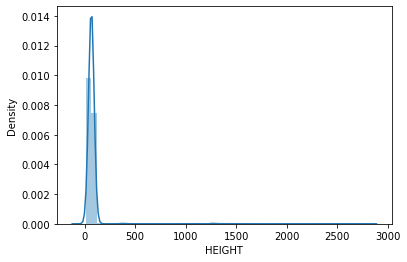

In [117]:
sns.distplot(df_vehicle19_speed['HEIGHT']);

C:\Users\shevc\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


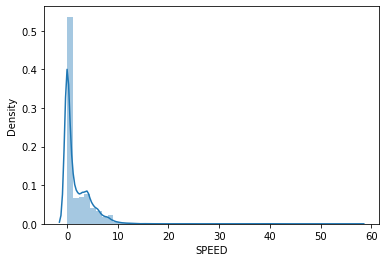

In [118]:
sns.distplot(df_vehicle19_speed['SPEED']);

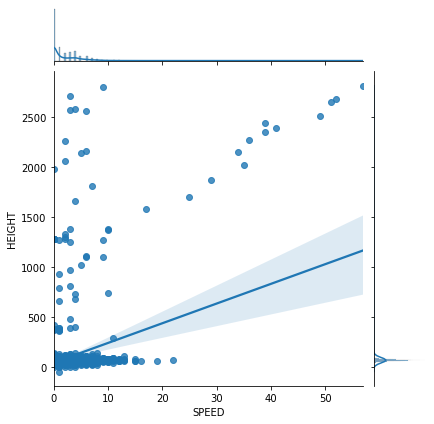

In [123]:
#построим график, чтобы увидеть, насколько изменяется уровень из-за скорости
sns.jointplot(
    x='SPEED',
    y='HEIGHT',
    data=df_vehicle19_speed,
    kind='reg' # or 'kde' or 'hex'
)


In [ ]:
'''
Исходя из графиков по фрейму, можно сделать выводы, что, в основном:
- Скорость данного ТС, по большей мере, от 0 до 15 км/ч, в среднем, меньше 10
- Высота над уровнем моря, в среднем, не превышает 80-100 м
- Есть достаточно странные значения, больше похожие на выбросы, которые утверждают, что ТС способен
разгоняться до 57 км/ч (максимально), с высотой над уровнем моря 2800 м

'''

In [125]:
#рассмотрим фрейм с тахометром
#У каждого автомобиля свой оптимальный диапазон для стрелки тахометра.
df_vehicle19_tach.dtypes

DTIME      object
BEVALUE     int64
dtype: object

In [128]:
df_vehicle19_tach['DTIME'] = pd.to_datetime(df_vehicle19_tach['DTIME'])

In [139]:
df_vehicle19_tach['BEVALUE'].median()

1092.0

In [134]:
df_vehicle19_speed.head()

,DTIME,SPEED,HEIGHT
0,2020-01-09 06:54:54,0,75.9
1,2020-01-09 06:55:55,0,75.9
2,2020-01-09 06:56:55,0,75.9
3,2020-01-09 06:57:55,0,75.9
4,2020-01-09 06:58:55,0,75.9


In [135]:
#для удобства можно соединить по времени таблицы тахометра и телематики
df_vehicle19_car = pd.merge(df_vehicle19_tach, df_vehicle19_speed, on='DTIME', how='outer')

In [137]:
df_vehicle19_car.head(10)

,DTIME,BEVALUE,SPEED,HEIGHT
0,2020-01-09 06:54:54,71,0.0,75.9
1,2020-01-09 06:55:55,146,0.0,75.9
2,2020-01-09 06:56:55,183,0.0,75.9
3,2020-01-09 06:57:55,222,0.0,75.9
4,2020-01-09 06:58:55,260,0.0,75.9
5,2020-01-09 06:59:55,318,0.0,75.9
6,2020-01-09 07:00:55,391,0.0,75.9
7,2020-01-09 07:01:43,462,4.0,72.1
8,2020-01-09 07:02:07,524,1.0,73.4
9,2020-01-09 07:02:49,601,4.0,69.8


C:\Users\shevc\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


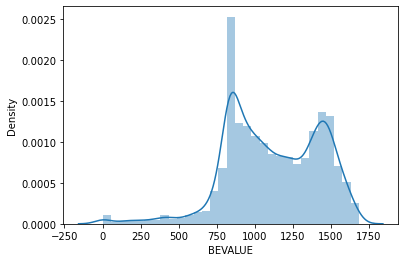

In [140]:
sns.distplot(df_vehicle19_car['BEVALUE']);

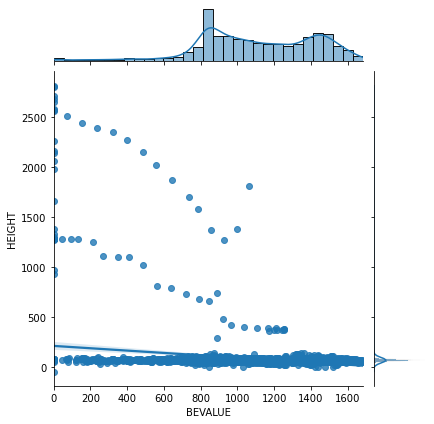

In [141]:
sns.jointplot(
    x='BEVALUE',
    y='HEIGHT',
    data=df_vehicle19_car,
    kind='reg' # or 'kde' or 'hex'
)

In [63]:
df_vehicle19_all['BEVALUE_fuel'].max()

'95'

In [ ]:
'''
Распределение данных тахометра говорит о неоднородности данных, однако, можно сделать вывод, 
что стрелка тахометра колеблется от ~900 до 1700 оборотов.
Скорее всего, такое распределение получается из-за разгона и "устаканивания" показаний тахометра.
- Однако, по такому распределению можно уже сделать вывод, что ТС - не легковой автомобиль на бензине,
тк бензиновый двигатель имеет, обычно от 2000 до 5000 оборотов в "зеленой зоне".
- Скорее всего, машина имеет дизельный двигатель.
- Максимальная скорость данного транспортного средства 57 км/ч, обычно от 0 до 10
- Высота над уровнем моря, в среднем, 66 м и не меняется в зависимости от скорости, если исключить выбросы.
С такой низкой скоростью, высотой относительно геоида и показаниями тахометра - обычно двигаются тяжелые,
крупные, низкоманевренные транспортные средства.
- Проанализировав максимальный уровень топлива ТС, выяснено, что оно составляло 95 литров.
Обычно, такая вместимость у внедорожников или небольших грузовиков, но более крупного ТС,
чем легковая машина.
'''

In [ ]:
'''
Используя полученную информацию и информацию об автомобилях, предполагаю, что ТС под номером vehicle 19:
Строительная техника.
'''